In [1]:
import os
import h5py
import numpy as np
from tensorflow.keras import utils
import pylab as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from PIL import Image

In [ ]:
# Download data (temporarily stored in dropbox)
if not os.path.isfile('Galaxy10.h5'):
    !wget https://www.dropbox.com/s/t3fvmlabzwtzpnv/Galaxy10.h5

In [5]:
# Load the images and labels from dataset file
# h5 file contains multidimensional arrays
with h5py.File('Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

print('Data loaded successfully')

# Galaxy10 dataset (21785 images)
# ├── Class 0: Disk, Face-on, No Spiral
# ├── Class 1: Smooth, Completely round
# ├── Class 2: Smooth, in-between round
# ├── Class 3: Smooth, Cigar shaped
# ├── Class 4: Disk, Edge-on, Rounded Bulge
# ├── Class 5: Disk, Edge-on, Boxy Bulge
# ├── Class 6: Disk, Edge-on, No Bulge
# ├── Class 7: Disk, Face-on, Tight Spiral
# ├── Class 8: Disk, Face-on, Medium Spiral
# └── Class 9: Disk, Face-on, Loose Spiral
class_names = ['Disk-Face_on-No_Spiral', 'Smooth-Completely-round', 'Smooth-in_between-round', 
               'Smooth-Cigar_shaped', 'Disk-Edge_on-Rounded_Bulge', 'Disk-Edge_on-Boxy_Bulge', 
               'Disk-Edge_on-No_Bulge', 'Disk-Face_on-Tight_Spiral', 'Disk-Face_on-Medium_Spiral', 
               'Disk-Face_on-Loose_Spiral']

Data loaded successfully


Images to display: [20884  6950  8864 14332 12253  6717  5063  6995  6995  3263]


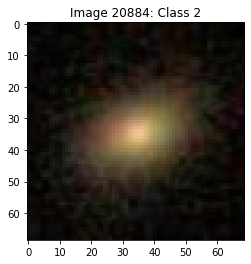

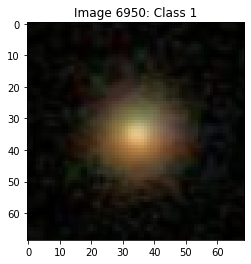

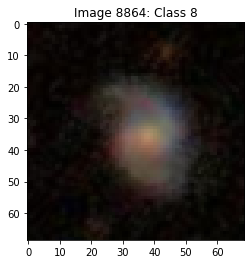

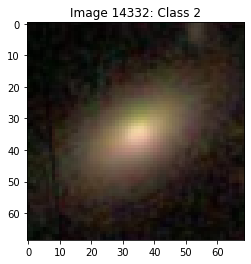

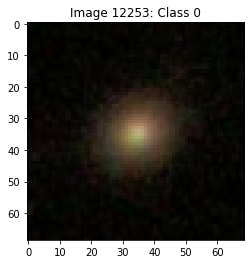

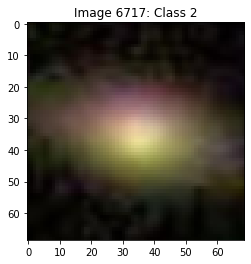

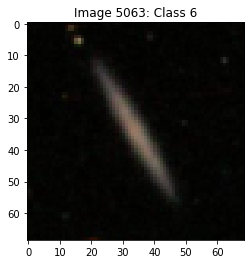

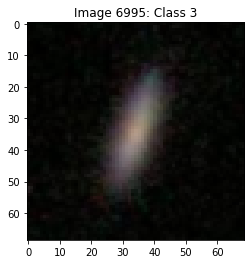

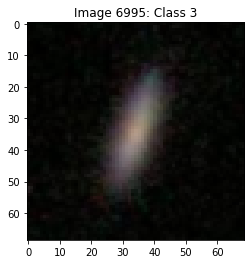

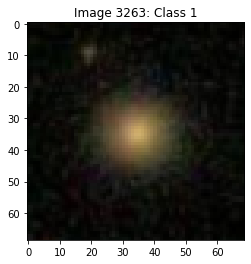

In [3]:
# Select 10 of the images to inspect
img = None
plt.ion()

# Random indexes in dataset range
samples = np.random.randint(0, labels.shape[0], size=10)
print('Images index to display:', samples)
for i in samples:
    img = plt.imshow(images[i])
    plt.title('Image {}: Class {}'.format(i, labels[i]))
    plt.draw()
    plt.pause(2.)
plt.close('all')

In [6]:
# To convert the labels to categorical 10 classes
# Categorical format is required for training
labels_cat = utils.to_categorical(labels, 10)

print('Categorical label:', labels_cat[0])
print('Shape of data structure labels {} and images {}'.format(labels_cat.shape, images.shape))

Categorical label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Shape of data structure labels (21785, 10) and images (21785, 69, 69, 3)


In [7]:
# Trivial data exploration
print('Dataset images per class:', np.sum(labels_cat, axis=0))
# Data is unbalanced

Dataset images per class: [3461. 6997. 6292.  349. 1534.   17.  589. 1121.  906.  519.]


In [15]:
# Split the dataset into training and testing set (RANDOMLY)
train_idx, test_idx = train_test_split(np.arange(labels_cat.shape[0]), test_size=0.2)
train_labels = labels_cat[train_idx]
test_labels = labels_cat[test_idx]
print('Train - images per class:', np.sum(train_labels, axis=0))
print('Test - images per class:', np.sum(test_labels, axis=0))

Train - images per class: [2772. 5588. 5079.  282. 1204.   11.  471.  878.  732.  411.]
Test - images per class: [ 689. 1409. 1213.   67.  330.    6.  118.  243.  174.  108.]


In [7]:
# Partitions keeping classes ratio - Stratified partitions
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_idx, test_idx in sss.split(labels, labels):
    train_labels = labels_cat[train_idx]
    test_labels = labels_cat[test_idx]
    print("TRAIN indexes:", train_idx, "number of objects:", train_idx.shape)
    print(np.sum(train_labels, axis=0))
    print("TEST indexes:", test_idx, "number of objects:", test_idx.shape)
    print(np.sum(test_labels, axis=0))

train_labels = labels[train_idx]
test_labels = labels[test_idx]
train_images = images[train_idx]
test_images = images[test_idx]

TRAIN: [14735 18646 10105 ... 20813  4946  8529] number of objects: (17428,)
[2769. 5598. 5034.  279. 1227.   13.  471.  897.  725.  415.]
TEST: [20127 18605 21351 ... 10996  5602  2127] number of objects: (4357,)
[ 692. 1399. 1258.   70.  307.    4.  118.  224.  181.  104.]


In [9]:
# Automatic train-val data dump from partitions
main = os.getcwd()
# Create directory tree and save images
dataset_dirname = 'Galaxy10'

try:
    os.mkdir(dataset_dirname)
except OSError:
    print('OSError: Creating or already exists the directory')

# Main dataset folder
os.chdir(dataset_dirname)

# Train partition
os.mkdir('train')
os.chdir('train')
for cls in class_names:   # for each class 'cls'
    os.mkdir(cls)
    # train/<class> folder save images
    cls_int = class_names.index(cls)
    print('Train - Class: ', cls)
    for i in range(len(train_labels)):   # traverse all train lavels
        if train_labels[i] == cls_int:   # save instance 'i' belong to class 'cls'
            img_path = os.path.join(os.getcwd(), cls)
            #print('Save image {} in {}'.format(i, img_path))
            img = Image.fromarray(train_images[i])
            img.save(os.path.join(img_path, 'galaxy10_img{}.jpg'.format(i)))

# Validation partition
os.chdir(os.path.join(main, dataset_dirname))
os.mkdir('val')
os.chdir('val')
for cls in class_names:
    os.mkdir(cls)
    # val/<class> folder save images
    cls_int = class_names.index(cls)
    print('Validation - Class: ', cls)
    for i in range(len(test_labels)):   # traverse all train lavels
        if test_labels[i] == cls_int:   # save instance 'i' belong to class 'cls'
            img_path = os.path.join(os.getcwd(), cls)
            #print('Save image {} in {}'.format(i, img_path))
            img = Image.fromarray(test_images[i])
            img.save(os.path.join(img_path, 'galaxy10_img{}.jpg'.format(i)))

os.chdir(main)

Train - Class:  Disk-Face_on-No_Spiral
Train - Class:  Smooth-Completely-round
Train - Class:  Smooth-in_between-round
Train - Class:  Smooth-Cigar_shaped
Train - Class:  Disk-Edge_on-Rounded_Bulge
Train - Class:  Disk-Edge_on-Boxy_Bulge
Train - Class:  Disk-Edge_on-No_Bulge
Train - Class:  Disk-Face_on-Tight_Spiral
Train - Class:  Disk-Face_on-Medium_Spiral
Train - Class:  Disk-Face_on-Loose_Spiral
Validation - Class:  Disk-Face_on-No_Spiral
Validation - Class:  Smooth-Completely-round
Validation - Class:  Smooth-in_between-round
Validation - Class:  Smooth-Cigar_shaped
Validation - Class:  Disk-Edge_on-Rounded_Bulge
Validation - Class:  Disk-Edge_on-Boxy_Bulge
Validation - Class:  Disk-Edge_on-No_Bulge
Validation - Class:  Disk-Face_on-Tight_Spiral
Validation - Class:  Disk-Face_on-Medium_Spiral
Validation - Class:  Disk-Face_on-Loose_Spiral
